In [55]:
import pandas as pd

from df_information import DataFrameInfo
from data_transform import DataTransform
from df_transform import DataFrameTransform
from plotter import Plotter

### Loading variables 

In [56]:
# load the data into df
df = pd.read_csv('../loan_payments.csv')

In [57]:
# df_info contains methods that generate useful information about the DataFrame
df_info = DataFrameInfo()

# to do conversions on columns of data (e.g. changing its dtype, or date formats)
data_formatter = DataTransform()

# A df_transformer performs EDA transformations on the dataframe e.g. imputation
df_transformer = DataFrameTransform()

# A class to plot helpful visuals
plotter = Plotter()

Loaded DataFrameInfo()...
Loaded DataTransform()...
Loaded DataFrameTransform()...
Loaded Plotter()...


### Summary statistics 

Calling a few basic functions to get an overview of the dataframe. Calls like .head(), .info, .shape and .describe()

In [58]:
df.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,0.0,0.0,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,0.0,0.0,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,0.0,0.0,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,0.0,0.0,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,0.0,0.0,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL


In [59]:
df.shape

(54231, 43)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

### Correct the column formats 

##### Dates

In [61]:
# Note how the ouptut format is 'Jan-2021'. we want it to be '2022-01-01'.
# The type of the column is also 'object', and not some kind of date.
df['issue_date'].head()

0    Jan-2021
1    Jan-2021
2    Jan-2021
3    Jan-2021
4    Jan-2021
Name: issue_date, dtype: object

In [62]:
# Columns which are currently objects, but need to be converted to dates 
object_to_date_columns = df[['issue_date', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date', 'earliest_credit_line']]

df = data_formatter.convert_obj_columns_to_date(df, column_list=object_to_date_columns, current_format="%b-%Y")

In [63]:
# The output confirms that the format has changed.
df['last_payment_date'].head()

0   2022-01-01
1   2022-01-01
2   2021-10-01
3   2021-06-01
4   2022-01-01
Name: last_payment_date, dtype: datetime64[ns]

##### Categories 

In [64]:
# Columns which are object types, but are to be converted to categorical types
obj_into_category_columns = df[['grade', 'sub_grade', 'employment_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'application_type', 'payment_plan', 'term']]
obj_into_category_columns.head()

,grade,sub_grade,employment_length,home_ownership,verification_status,loan_status,purpose,application_type,payment_plan,term
0,A,A4,5 years,MORTGAGE,Not Verified,Current,credit_card,INDIVIDUAL,n,36 months
1,A,A3,9 years,RENT,Not Verified,Current,credit_card,INDIVIDUAL,n,36 months
2,A,A4,8 years,MORTGAGE,Source Verified,Fully Paid,credit_card,INDIVIDUAL,n,36 months
3,C,C4,1 year,RENT,Source Verified,Fully Paid,debt_consolidation,INDIVIDUAL,n,36 months
4,A,A1,10+ years,MORTGAGE,Verified,Current,debt_consolidation,INDIVIDUAL,n,36 months


Based on the above, it seems as though the grade column is redundant since the grade is always contained in the sub_grade. Let me test this first.

In [65]:
# Check if sub_grade's first letter matches grade
grade_matches = df['grade'] == df['sub_grade'].str[0]

# Check if all rows match 
if grade_matches.all():
  print('sub_grade always contains the grade')
else:
  print('sub_grade does not always contain the grade')

sub_grade always contains the grade


It is true, so I will go ahead and remove grade from the dataframe. 

In [66]:
df = df_transformer.drop_column(df, df['grade'])

In [67]:
obj_into_category_columns = df[['sub_grade', 'employment_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'application_type', 'payment_plan', 'term']]
obj_into_category_columns.head()

,sub_grade,employment_length,home_ownership,verification_status,loan_status,purpose,application_type,payment_plan,term
0,A4,5 years,MORTGAGE,Not Verified,Current,credit_card,INDIVIDUAL,n,36 months
1,A3,9 years,RENT,Not Verified,Current,credit_card,INDIVIDUAL,n,36 months
2,A4,8 years,MORTGAGE,Source Verified,Fully Paid,credit_card,INDIVIDUAL,n,36 months
3,C4,1 year,RENT,Source Verified,Fully Paid,debt_consolidation,INDIVIDUAL,n,36 months
4,A1,10+ years,MORTGAGE,Verified,Current,debt_consolidation,INDIVIDUAL,n,36 months


In [68]:
obj_into_category_columns = data_formatter.convert_object_columns_into_categories(obj_into_category_columns)

There are some numeric columns, where the vast majority of values are a single value, and the rest are spread out in low numbers. 

Such columns cannot be normally distributed easily, and so I will convert them into categorical columns with ranges to group thier values. 

There are some columns which I am unsure about converting to categories, so I will leave them as they are for now. They are also hard to distribute symetrically, but I am not confident that they actually should be. For future reference, they are:
- annual_inc
- last_payment_amount
- open_accounts
- out_prncp_inv
- out_prncp

In [69]:
columns_to_be_categories = ["collection_recovery_fee", "recoveries", "total_rec_late_fee", "delinq_2yrs", "inq_last_6mths"]

The value_counts() show that the majority of values are zero. Trying to normalise this distribution would change the underlying data too much, and so making it a categorical feature with ranges of values instead of numbers seems preferable. 

In [70]:
df['collections_12_mths_ex_med'].value_counts()

collections_12_mths_ex_med
0.0    53971
1.0      193
2.0       14
3.0        1
4.0        1
Name: count, dtype: int64

In [71]:
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].astype('category')

The Series above only contains 5 values and so it is easy to convert to a category. 

The next 4 columns (`delinq_2yrs`, `inq_last_6mths`, `recoveries`, `total_rec_late_fee`) contain many more, and so I will create ranges from the spread of values and use those as categories. 

The of those two are floats, and are to be converted to Int64's. There is no useful information lost from this conversion, and it simplifies the categorisation. 

In [72]:
df['delinq_2yrs'] = data_formatter.int64_to_category_with_ranges(df, df['delinq_2yrs'])
df['inq_last_6mths'] = data_formatter.int64_to_category_with_ranges(df, df['inq_last_6mths'])

In [73]:
df['recoveries'] = round(df['recoveries']).astype('Int64')
df['recoveries'] = data_formatter.int64_to_category_with_ranges(df, df['recoveries'])

df['total_rec_late_fee'] = round(df['total_rec_late_fee']).astype('Int64')
df['total_rec_late_fee'] = data_formatter.int64_to_category_with_ranges(df, df['total_rec_late_fee'])

In [74]:
df.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,sub_grade,employment_length,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A4,5 years,...,0,0.0,2022-01-01,248.82,2022-02-01,2022-01-01,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A3,9 years,...,0,0.0,2022-01-01,407.52,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A4,8 years,...,0,0.0,2021-10-01,12850.16,NaT,2021-10-01,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C4,1 year,...,0,0.0,2021-06-01,13899.67,NaT,2021-06-01,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A1,10+ years,...,0,0.0,2022-01-01,456.54,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL


#### Numeric

In [75]:
# These four columns all represent a number of months, and so can be cast to int64s
float64_columns_into_int64 = df[['mths_since_last_major_derog', 'mths_since_last_delinq', 'mths_since_last_record']]
float64_columns_into_int64 = data_formatter.convert_float64_columns_into_int64s(float64_columns_into_int64)

### Handle null values

I will first identify the variables with missing values and determine the percentage of missing values in each variable.

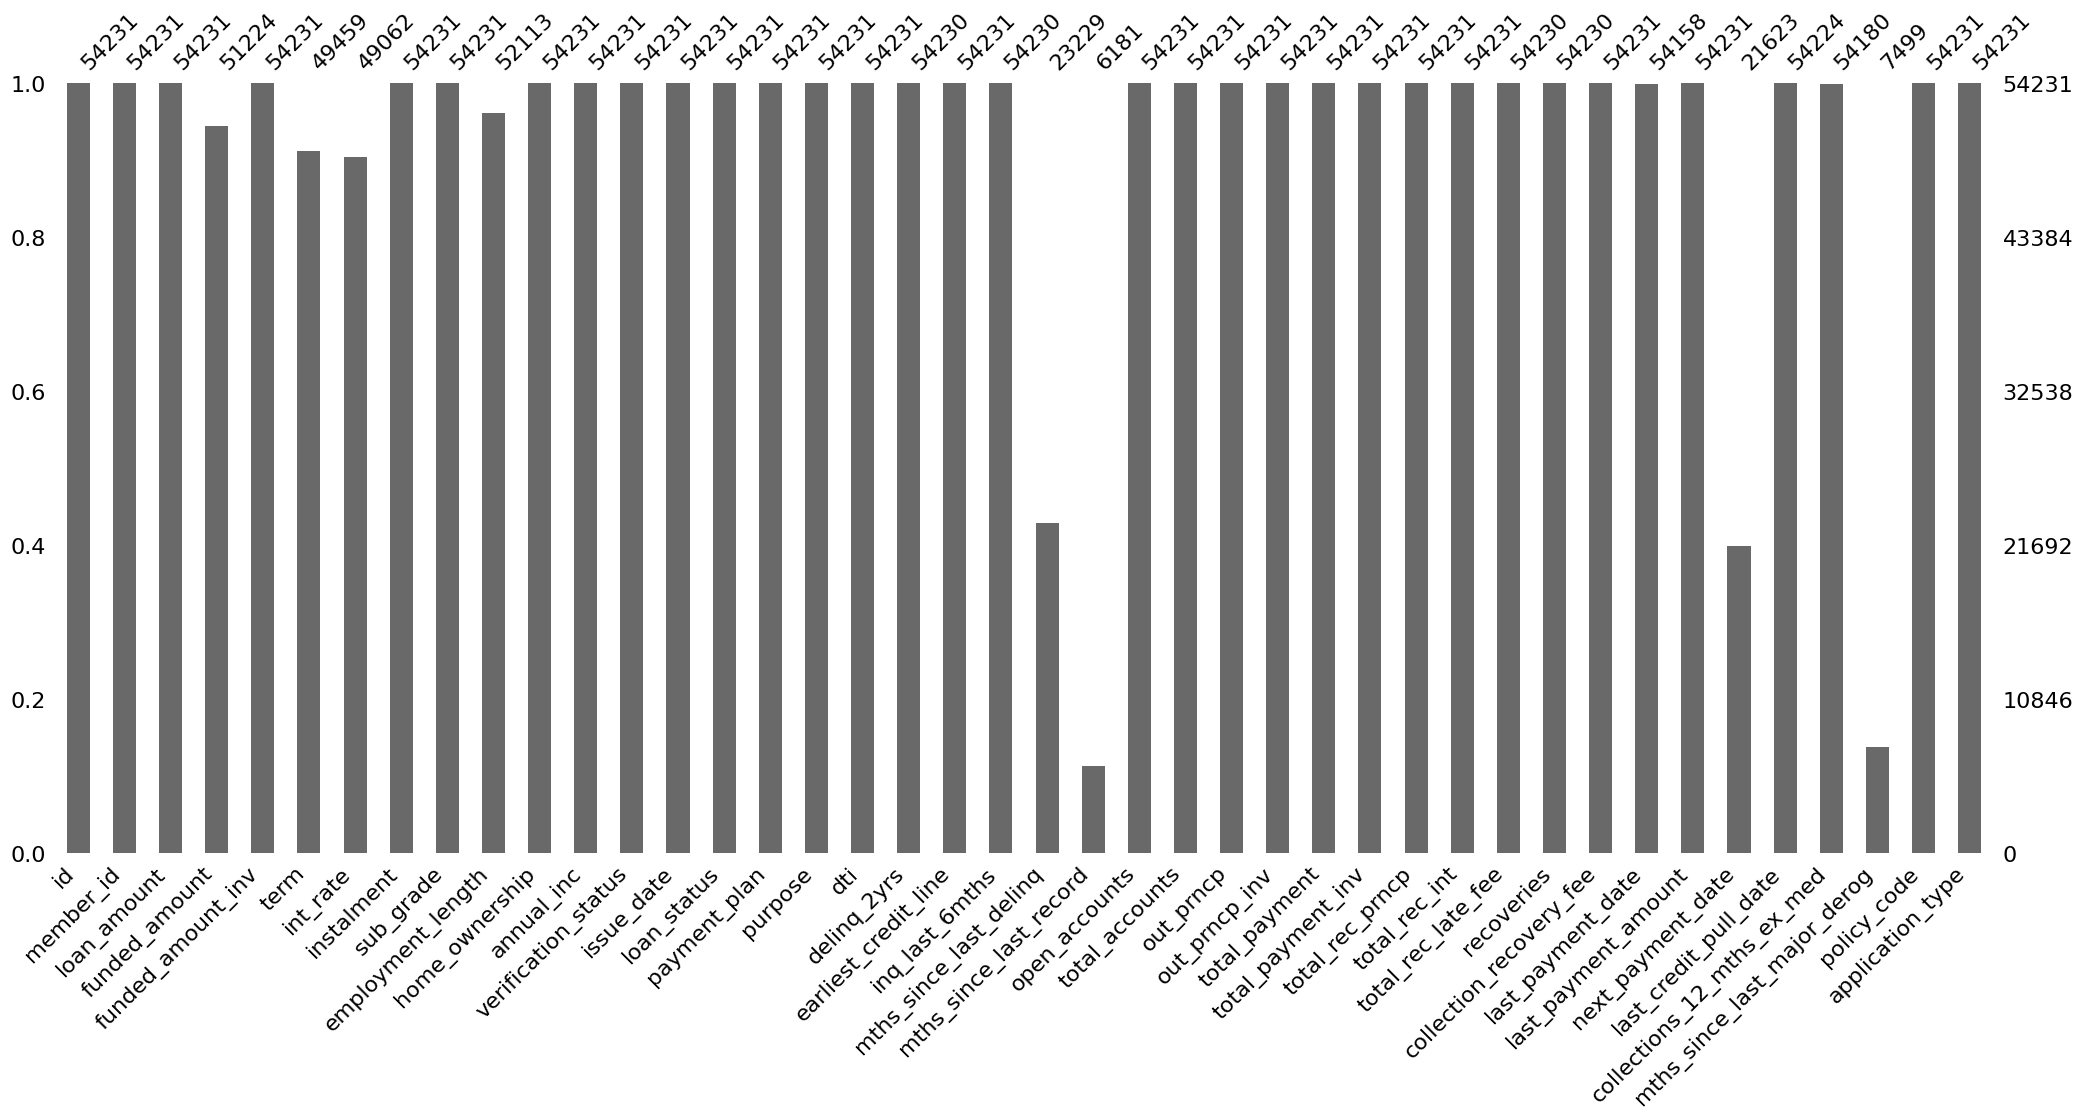

In [76]:
plot = plotter.show_null_bar_chart(df)

In [77]:
message, progress = df_info.print_null_removal_progress(df)
print(message)
progress

There are 15 columns with null values left:



,% of nulls,# of nulls,dtype
mths_since_last_record,88.60,48050,float64
mths_since_last_major_derog,86.17,46732,float64
next_payment_date,60.13,32608,datetime64[ns]
mths_since_last_delinq,57.17,31002,float64
int_rate,9.53,5169,float64
term,8.80,4772,object
funded_amount,5.54,3007,float64
employment_length,3.91,2118,object
last_payment_date,0.13,73,datetime64[ns]
collections_12_mths_ex_med,0.09,51,category


#### Dropping columns

**I now will decide which of the above columns are worth dropping entirely, and proceed to do so.**

Based on the above there are 4 columns with very high proportions of nulls:

`[88.60%, 86.17%, 60.13%, 57.17%]`

The next biggest is 9.53%, which is a huge distance from the top 4.

As a result I am going to *remove all columns with >50% null values*.

In [78]:
df.shape

(54231, 42)

In [79]:
# returns a series showing the % of null values for every column in the dataframe
percent_of_nulls = df_info.percentage_of_nulls_in_data_frame(df)

# Extract columns whose majority (> 50%) of values are null, to pass into drop()
more_than_half_null_cols = percent_of_nulls[percent_of_nulls > 50.00]

# Drop the selected columns from the dataframe
df = df_transformer.drop_columns(df, more_than_half_null_cols)

In [80]:
df.shape

(54231, 38)

Printing shape before and after has confirmed that 4 columns have been removed, as it went from 42 down to 38. 

This is not to do with null handling, but I noticed that the policy_code column has a value of 1 for every single entry, so the column itself is not of any use to our analysis. 

Since we have a lot of other columns to attend to, I will drop the policy_code column to remove it from the data going forward. 

In [81]:
df = df_transformer.drop_column(df, df['policy_code'])

#### Imputing

In [82]:
message, progress = df_info.print_null_removal_progress(df)
print(message)
progress

There are 11 columns with null values left:



,% of nulls,# of nulls,dtype
int_rate,9.53,5169,float64
term,8.80,4772,object
funded_amount,5.54,3007,float64
employment_length,3.91,2118,object
last_payment_date,0.13,73,datetime64[ns]
collections_12_mths_ex_med,0.09,51,category
last_credit_pull_date,0.01,7,datetime64[ns]
delinq_2yrs,0.00,1,category
inq_last_6mths,0.00,1,category
total_rec_late_fee,0.00,1,category


##### Mode imputations

The column `(term)` only has two values. 

- 36.0 occurs 35845 times
- 60.0 occurs 13614 times

There could be a relationship between this value and the other variables worth exploring, but for now I will impute the missing values with the mode. 

In [83]:
df['term'] = df_transformer.impute_nulls_in_column(df['term'], 'mode')

The column `employment_length` is categorical and so mode is the most appropriate replacement. 

Since ~ 4% of its values are null, doing this may skew the data. I can address this later.

In [84]:
df['employment_length'] = df_transformer.impute_nulls_in_column(df['employment_length'], 'mode')

In [85]:
message, progress = df_info.print_null_removal_progress(df)
print(message)
progress

There are 9 columns with null values left:



,% of nulls,# of nulls,dtype
int_rate,9.53,5169,float64
funded_amount,5.54,3007,float64
last_payment_date,0.13,73,datetime64[ns]
collections_12_mths_ex_med,0.09,51,category
last_credit_pull_date,0.01,7,datetime64[ns]
delinq_2yrs,0.00,1,category
inq_last_6mths,0.00,1,category
total_rec_late_fee,0.00,1,category
recoveries,0.00,1,category


##### Median imputations

For this stage I am simply going to use the average to impute `int_rate` and `funded_amount`.

In [86]:
df['int_rate'] = df_transformer.impute_nulls_in_column(df['int_rate'], 'median')

In [87]:
df['funded_amount'] = df_transformer.impute_nulls_in_column(df['funded_amount'], 'median')

In [88]:
message, progress = df_info.print_null_removal_progress(df)
print(message)
progress

There are 7 columns with null values left:



,% of nulls,# of nulls,dtype
last_payment_date,0.13,73,datetime64[ns]
collections_12_mths_ex_med,0.09,51,category
last_credit_pull_date,0.01,7,datetime64[ns]
delinq_2yrs,0.00,1,category
inq_last_6mths,0.00,1,category
total_rec_late_fee,0.00,1,category
recoveries,0.00,1,category


#### Dropping rows 

We have three rows left:

- The `last_credit_pull_date` column has `7` null values, or `~0.01%` of them.
- The `collections_12_mths_ex_med` column has `51` null values, or `~0.09%` of them.
- The `last_payment_date` column has `73` null values, or `~0.13%` of them

I am going to delete all of the corresponding rows. 

In [89]:
df = df_transformer.drop_rows_of_null_column_entries(df, df['last_credit_pull_date'])
df = df_transformer.drop_rows_of_null_column_entries(df, df['collections_12_mths_ex_med'])
df = df_transformer.drop_rows_of_null_column_entries(df, df['last_payment_date'])

#### Confirm all nulls removed 

In [90]:
message, progress = df_info.print_null_removal_progress(df)
print(message)
progress

There are 4 columns with null values left:



,% of nulls,# of nulls,dtype
delinq_2yrs,0.0,1,category
inq_last_6mths,0.0,1,category
total_rec_late_fee,0.0,1,category
recoveries,0.0,1,category


<Axes: >

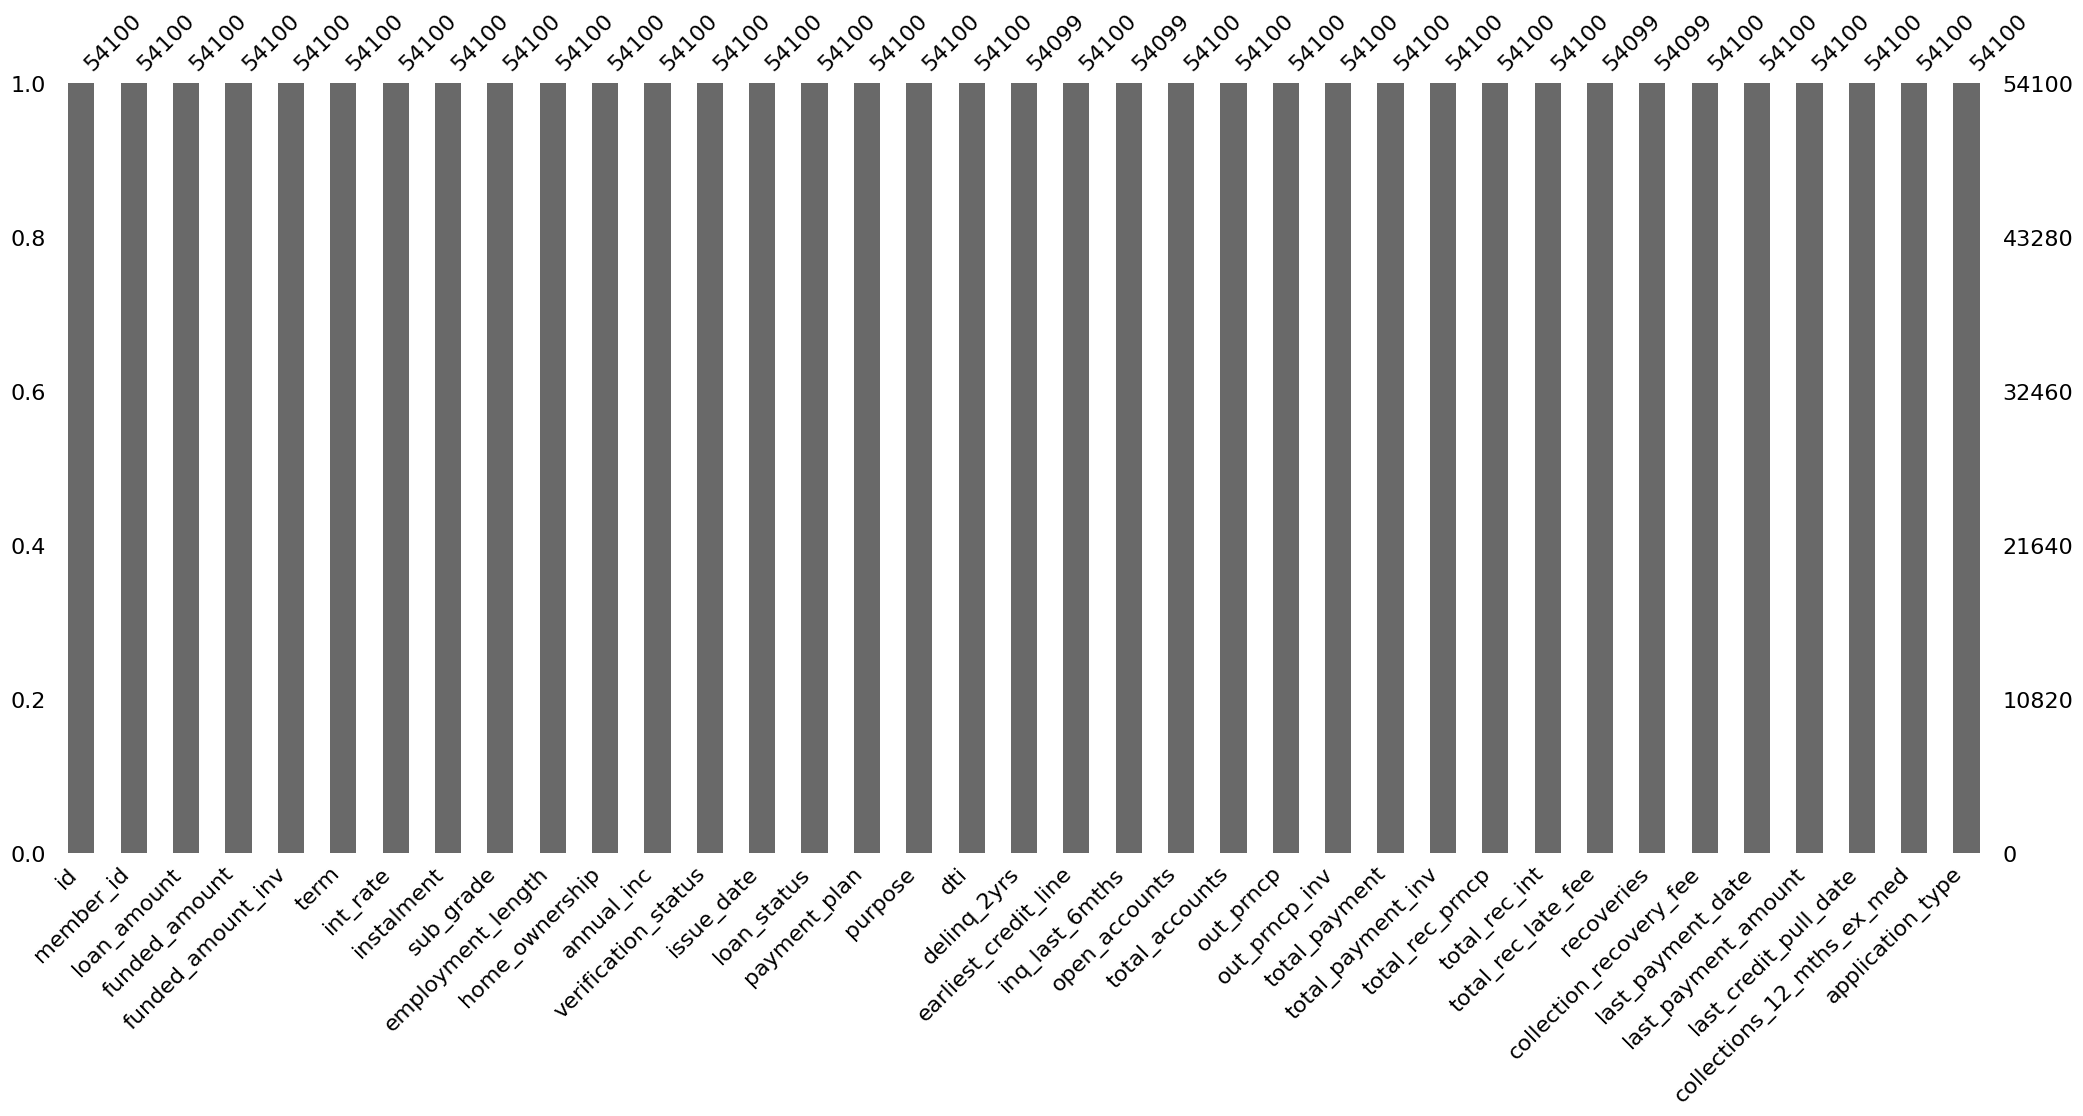

In [91]:
plotter.show_null_bar_chart(df)

### Skewed data

Lets first look at the skew value for each of the columns

In [92]:
# get a series showing the skew value for each column
skew_series = df_info.measure_skew_for_all_columns(df, sort=True)

# drop the two id columns since they are not to be changed anyway so skew is irrelevent
skew_series = skew_series.drop(['id', 'member_id'])

# construct a dataframe with these columns
skew_df = df[list(skew_series.index)]

skew_df

,collection_recovery_fee,annual_inc,last_payment_amount,out_prncp_inv,out_prncp,total_rec_int,total_payment,total_rec_prncp,total_payment_inv,open_accounts,instalment,funded_amount,funded_amount_inv,loan_amount,total_accounts,int_rate,dti
0,0.0,46000.0,248.82,5529.70,5529.70,512.21,2982.51,2470.30,2982.51,12,248.82,8000.0,8000.00,8000,27,7.49,19.54
1,0.0,50000.0,407.52,9102.83,9102.83,787.94,4885.11,4097.17,4885.11,15,407.52,13200.0,13200.00,13200,31,6.99,24.20
2,0.0,73913.0,12850.16,0.00,0.00,824.54,16824.54,16000.00,16824.54,7,497.63,16000.0,16000.00,16000,18,7.49,16.92
3,0.0,42000.0,13899.67,0.00,0.00,947.47,15947.47,15000.00,15947.47,6,514.93,15000.0,15000.00,15000,13,14.31,35.52
4,0.0,145000.0,456.54,10297.47,10297.47,770.93,5473.46,4702.53,5473.46,23,456.54,15000.0,15000.00,15000,50,6.03,3.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54199,0.0,30000.0,538.97,0.00,0.00,207.77,1207.76,999.99,0.00,9,35.20,1000.0,0.00,1000,15,16.08,23.84
54203,0.0,18000.0,193.55,0.00,0.00,933.06,6933.05,5999.99,544.67,4,192.60,6000.0,502.69,6000,4,9.64,2.87
54204,0.0,61800.0,126.29,0.00,0.00,495.79,4495.79,4000.00,1742.14,12,124.89,4000.0,1550.00,4000,16,7.75,3.46
54221,0.0,21000.0,85.66,0.00,0.00,303.77,5803.77,5500.00,5751.01,5,185.74,5500.0,5450.00,5500,6,13.16,19.20


In [93]:
skew_series

collection_recovery_fee    27.794716
annual_inc                  8.735737
last_payment_amount         2.496079
out_prncp_inv               2.352946
out_prncp                   2.352526
total_rec_int               2.203625
total_payment               1.269266
total_rec_prncp             1.262007
total_payment_inv           1.258474
open_accounts               1.059493
instalment                  0.996150
funded_amount               0.869102
funded_amount_inv           0.814251
loan_amount                 0.804312
total_accounts              0.780083
int_rate                    0.456055
dti                         0.189020
dtype: float64

In order to decide a cut off point for considering a column as skewed, I will look into those which appear to be normally distributed. 

The table above shows the skewness of the numeric features, sorted with the highest first. 

The closer a skew value is to 0, the more normally distributed it is; those lower in the table have the least skew.

To determine a cuttoff point for skewness *I will look at the kde histplot for each of the **last 4** values in the table*, focusing on how the rise in the skew value affects the extend of the skew. 

In [94]:
last_4_skew_cols = skew_series.tail(4)
last_four_names = [str(col_name) for col_name in last_4_skew_cols.index]
last_4_df = df[last_four_names]

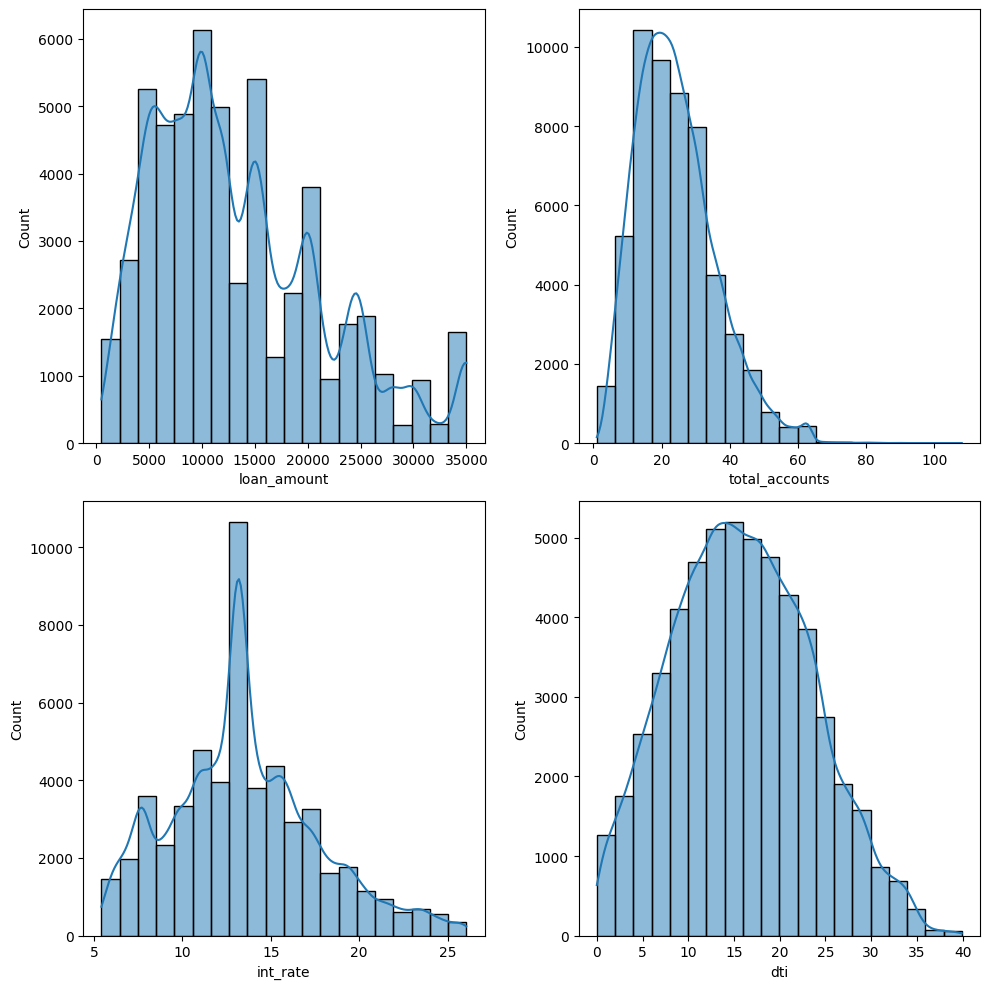

In [95]:
plotter.plot_hist_quad(last_4_df)

Looking at the above I notice that the lowest skew values at which skewness becomes apparent is 0.78 for the total_accounts column.

The next lowest is int_rate with a value of 0.456, and that looks normally distributed enough. 

As a result I am going to set my skew_threshold at 0.5.

#### Transform skewed columns 

Let's see the columns and their skews after applying the skew threshold.

In [96]:
SKEW_THRESHOLD = 0.5

# This will remove int_rate and dti since they are symmetric enough already.
skew_series = skew_series[skew_series > SKEW_THRESHOLD]
skew_series

collection_recovery_fee    27.794716
annual_inc                  8.735737
last_payment_amount         2.496079
out_prncp_inv               2.352946
out_prncp                   2.352526
total_rec_int               2.203625
total_payment               1.269266
total_rec_prncp             1.262007
total_payment_inv           1.258474
open_accounts               1.059493
instalment                  0.996150
funded_amount               0.869102
funded_amount_inv           0.814251
loan_amount                 0.804312
total_accounts              0.780083
dtype: float64

In [97]:
# construct a dataframe with these columns
skew_df = df[list(skew_series.index)]

skew_df

,collection_recovery_fee,annual_inc,last_payment_amount,out_prncp_inv,out_prncp,total_rec_int,total_payment,total_rec_prncp,total_payment_inv,open_accounts,instalment,funded_amount,funded_amount_inv,loan_amount,total_accounts
0,0.0,46000.0,248.82,5529.70,5529.70,512.21,2982.51,2470.30,2982.51,12,248.82,8000.0,8000.00,8000,27
1,0.0,50000.0,407.52,9102.83,9102.83,787.94,4885.11,4097.17,4885.11,15,407.52,13200.0,13200.00,13200,31
2,0.0,73913.0,12850.16,0.00,0.00,824.54,16824.54,16000.00,16824.54,7,497.63,16000.0,16000.00,16000,18
3,0.0,42000.0,13899.67,0.00,0.00,947.47,15947.47,15000.00,15947.47,6,514.93,15000.0,15000.00,15000,13
4,0.0,145000.0,456.54,10297.47,10297.47,770.93,5473.46,4702.53,5473.46,23,456.54,15000.0,15000.00,15000,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54199,0.0,30000.0,538.97,0.00,0.00,207.77,1207.76,999.99,0.00,9,35.20,1000.0,0.00,1000,15
54203,0.0,18000.0,193.55,0.00,0.00,933.06,6933.05,5999.99,544.67,4,192.60,6000.0,502.69,6000,4
54204,0.0,61800.0,126.29,0.00,0.00,495.79,4495.79,4000.00,1742.14,12,124.89,4000.0,1550.00,4000,16
54221,0.0,21000.0,85.66,0.00,0.00,303.77,5803.77,5500.00,5751.01,5,185.74,5500.0,5450.00,5500,6


First I am going to transform the column with the least skew:

`total_accounts` has a skew of `0.779`

In [98]:
# get the Series for the column with the lowest skew
skew_col_names = list(skew_series.index)
least_skewed_col_name: str = skew_col_names[len(skew_col_names) - 1]
least_skewed_col = df[least_skewed_col_name]

In [99]:
# get a series showing the skew value for each column
skew_series = df_info.measure_skew_for_all_columns(df, sort=True)
skew_series = skew_series[skew_series > SKEW_THRESHOLD]
skew_series = skew_series.drop(['id', 'member_id'])
skew_series

collection_recovery_fee    27.794716
annual_inc                  8.735737
last_payment_amount         2.496079
out_prncp_inv               2.352946
out_prncp                   2.352526
total_rec_int               2.203625
total_payment               1.269266
total_rec_prncp             1.262007
total_payment_inv           1.258474
open_accounts               1.059493
instalment                  0.996150
funded_amount               0.869102
funded_amount_inv           0.814251
loan_amount                 0.804312
total_accounts              0.780083
dtype: float64

Colum: total_accounts, with skew of 0.78.
Colum: total_accounts, with skew of -0.013.


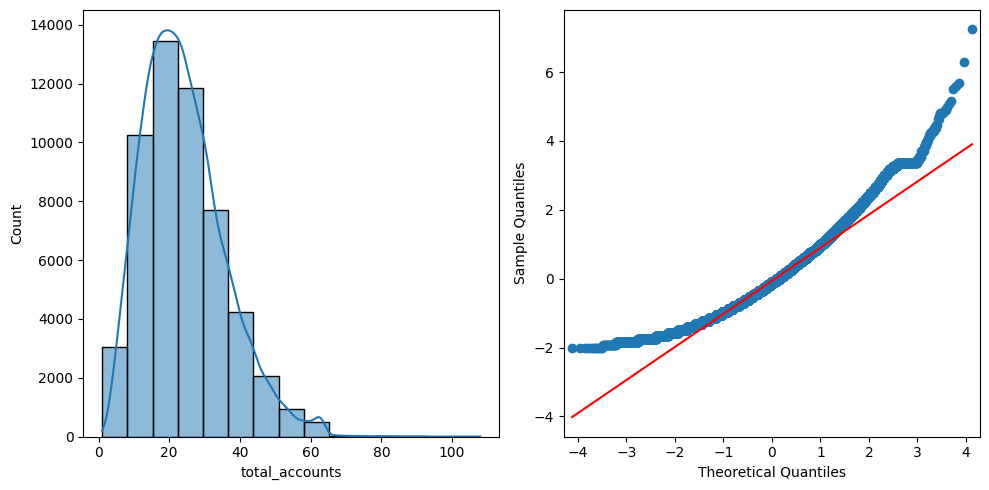

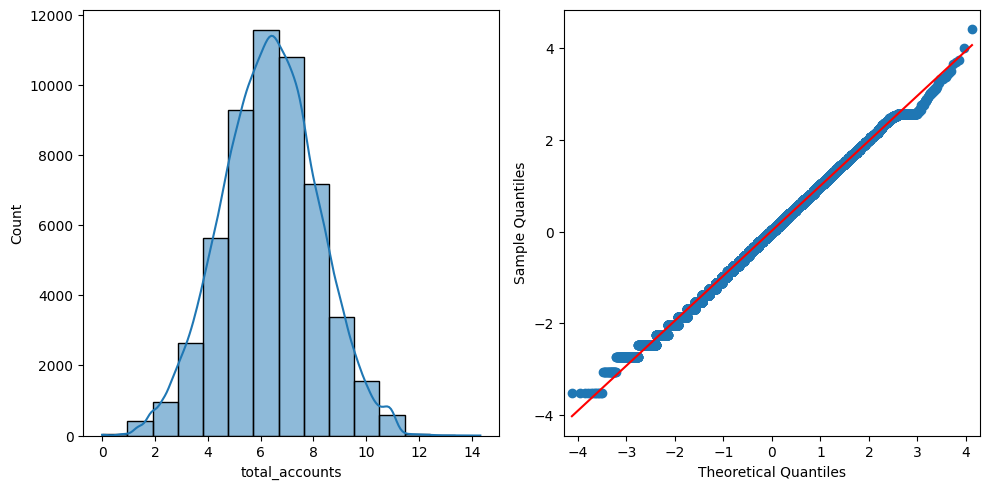

In [100]:
column_name = "total_accounts"
column = df[column_name]
msg = plotter.plot_hist_and_qq(column)
print(msg)

# Apply box cox transform 
transformed_column = df_transformer.box_cox_transform(column)

df = df_transformer.replace_column_after_box_cox(df, column, transformed_column)

column = df[column_name]
msg = plotter.plot_hist_and_qq(column)
print(msg)

In [101]:
column = df["loan_amount"]
# Apply box cox transform 
transformed_column = df_transformer.box_cox_transform(column)
df = df_transformer.replace_column_after_box_cox(df, column, transformed_column)

column = df["funded_amount"]
# Apply box cox transform 
transformed_column = df_transformer.box_cox_transform(column)
df = df_transformer.replace_column_after_box_cox(df, column, transformed_column)

column = df["instalment"]
# Apply box cox transform 
transformed_column = df_transformer.box_cox_transform(column)
df = df_transformer.replace_column_after_box_cox(df, column, transformed_column)

column = df["total_payment"]
# Apply box cox transform 
transformed_column = df_transformer.box_cox_transform(column)
df = df_transformer.replace_column_after_box_cox(df, column, transformed_column)

column = df["total_rec_int"]
# Apply box cox transform 
transformed_column = df_transformer.box_cox_transform(column)
df = df_transformer.replace_column_after_box_cox(df, column, transformed_column)

In [102]:
# get a series showing the skew value for each column
skew_series = df_info.measure_skew_for_all_columns(df, sort=True)
skew_series = skew_series[skew_series > SKEW_THRESHOLD]
skew_series = skew_series.drop(['id', 'member_id'])
skew_series

collection_recovery_fee    27.794716
annual_inc                  8.735737
last_payment_amount         2.496079
out_prncp_inv               2.352946
out_prncp                   2.352526
total_rec_prncp             1.262007
total_payment_inv           1.258474
open_accounts               1.059493
funded_amount_inv           0.814251
dtype: float64

The following are successfully updated with a box-cox transform.

- total_accounts
- loan_amount
- funded_amount
- instalment
- total_payment
- total_rec_int

And the following are not, due to containing values equal to 0
           
- total_rec_prncp      
- total_payment_inv    
- funded_amount_inv


In [103]:
# get a series showing the skew value for each column
skew_series = df_info.measure_skew_for_all_columns(df, sort=True)
skew_series = skew_series[skew_series > SKEW_THRESHOLD]
skew_series = skew_series.drop(['id', 'member_id'])
skew_series

collection_recovery_fee    27.794716
annual_inc                  8.735737
last_payment_amount         2.496079
out_prncp_inv               2.352946
out_prncp                   2.352526
total_rec_prncp             1.262007
total_payment_inv           1.258474
open_accounts               1.059493
funded_amount_inv           0.814251
dtype: float64

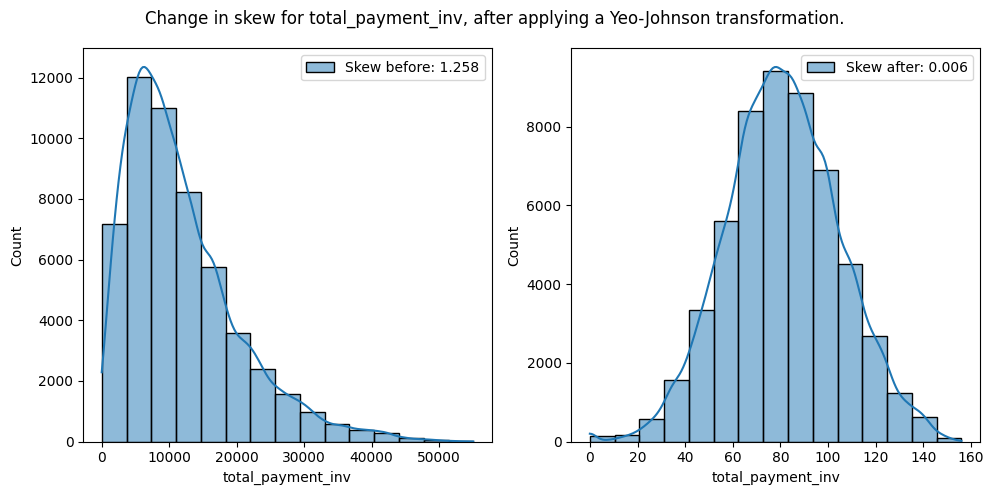

In [104]:
# Apply a Yeo-Johnson transform, and visualise the skewness before and after 
column_before = df['total_payment_inv']
column_after = df["total_payment_inv"] = df_transformer.yeo_johnson_transform(df['total_payment_inv'])

plotter.plot_hist_before_after_transform(column_before, column_after, transform_name="Yeo-Johnson")

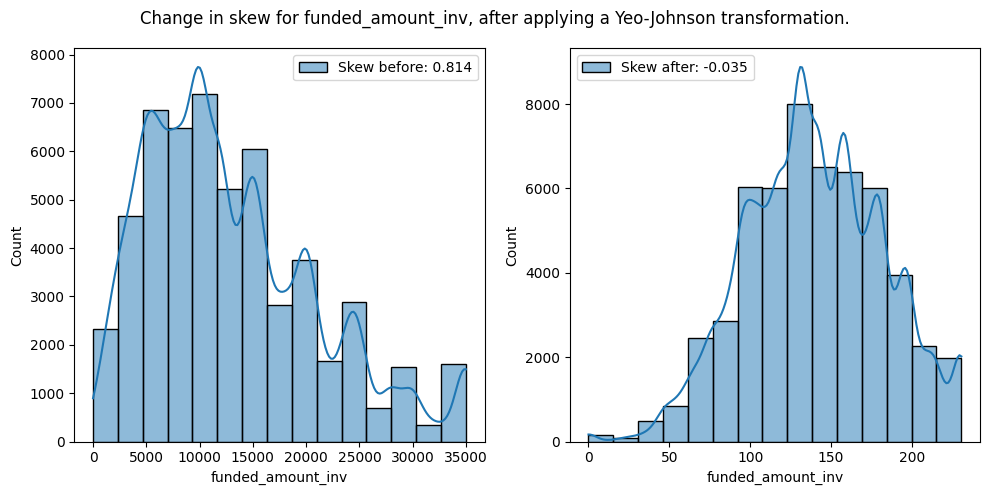

In [105]:
# Apply a Yeo-Johnson transform, and visualise the skewness before and after 
column_before = df['funded_amount_inv']
column_after = df["funded_amount_inv"] = df_transformer.yeo_johnson_transform(df['funded_amount_inv'])

plotter.plot_hist_before_after_transform(column_before, column_after, transform_name="Yeo-Johnson")

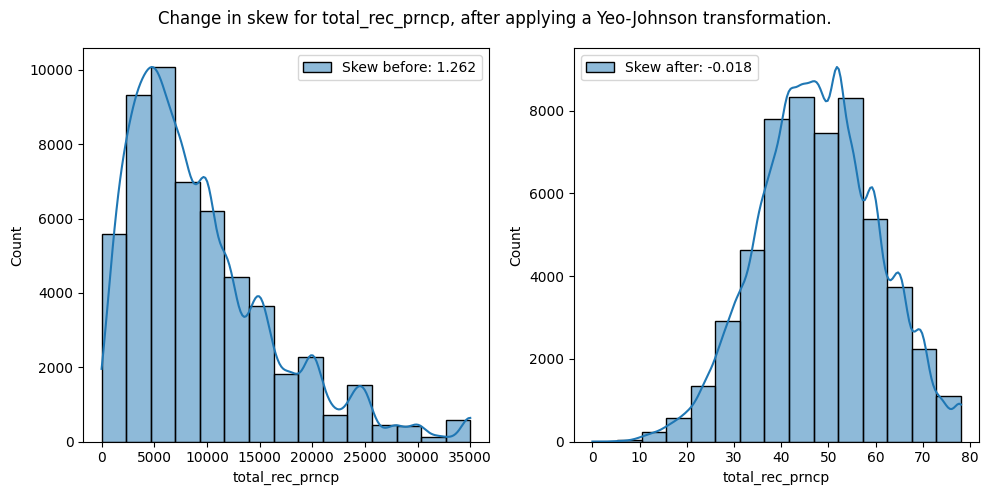

In [106]:
# Apply a Yeo-Johnson transform, and visualise the skewness before and after 
column_before = df['total_rec_prncp']
column_after = df["total_rec_prncp"] = df_transformer.yeo_johnson_transform(df['total_rec_prncp'])

plotter.plot_hist_before_after_transform(column_before, column_after, transform_name="Yeo-Johnson")

In [107]:

# outliers = df_info.get_outliers_from_z_score(df['total_rec_prncp'])
# plotter.scatter_outliers(original=df['total_rec_prncp'], outliers=outliers)

### Dropping overly-correlated columns

Print the correlation heatmap for the numeric columns of the data frame 

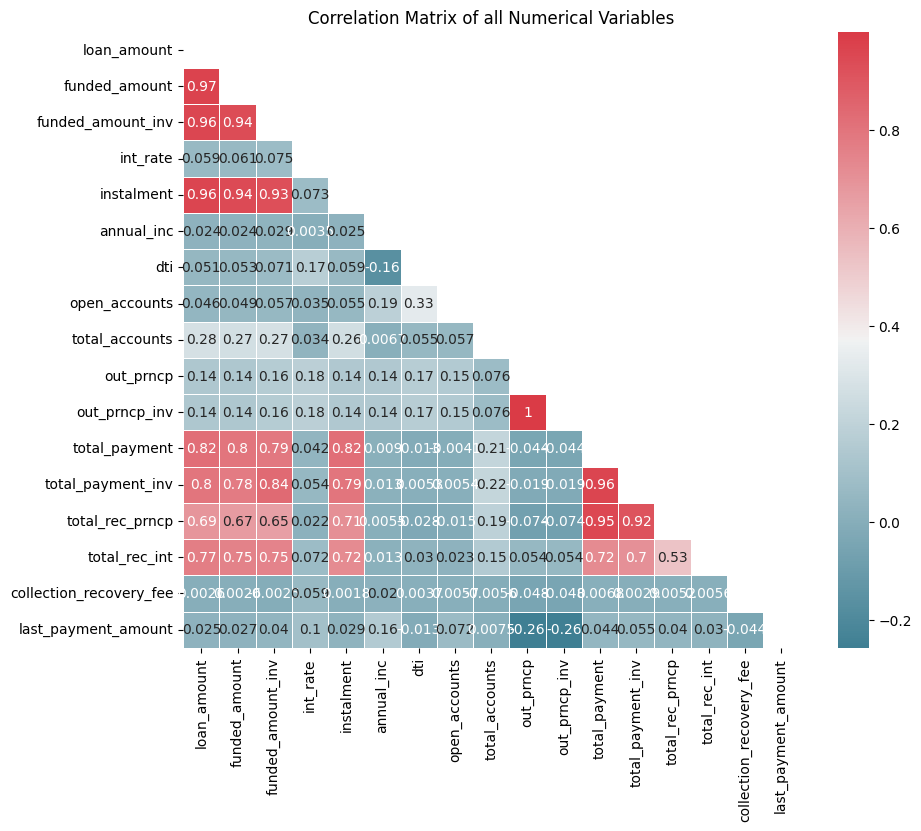

In [108]:
numeric_df = df_info.get_numeric_columns_from_df(df).drop(['id', 'member_id'], axis=1)
matrix = plotter.correlation_matrix(numeric_df)
# matrix.head()

I am going to remove all columns with a correlation greater than .90. In each case I will decide which of the two related columns is best to drop.

In [109]:
df = df_transformer.drop_column(df, df['instalment'])
df = df_transformer.drop_column(df, df['total_payment_inv'])
df = df_transformer.drop_column(df, df['funded_amount'])
df = df_transformer.drop_column(df, df['funded_amount_inv'])
df = df_transformer.drop_column(df, df['total_rec_prncp'])
df = df_transformer.drop_column(df, df['out_prncp_inv'])

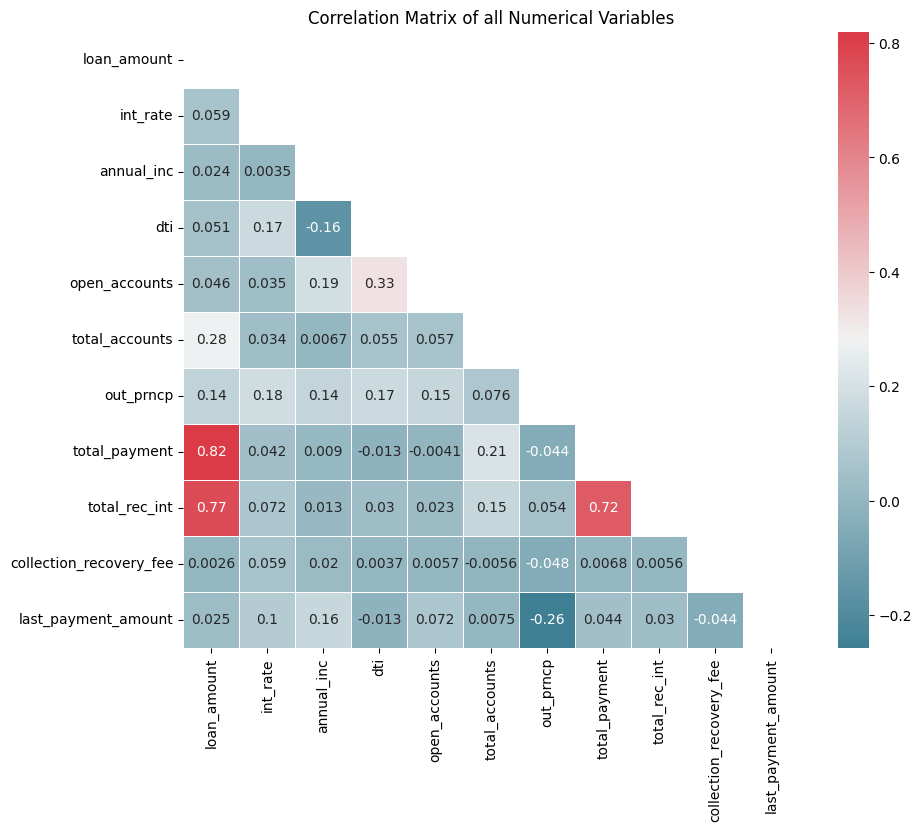

In [110]:
numeric_df = df_info.get_numeric_columns_from_df(df).drop(['id', 'member_id'], axis=1)
matrix = plotter.correlation_matrix(numeric_df)
# matrix.head()

In [111]:
df.head()

,id,member_id,loan_amount,term,int_rate,sub_grade,employment_length,home_ownership,annual_inc,verification_status,...,total_payment,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,application_type
0,38676116,41461848,68.067212,36 months,7.49,A4,5 years,MORTGAGE,46000.0,Not Verified,...,33.080669,10.850112,0,0,0.0,2022-01-01,248.82,2022-01-01,0.0,INDIVIDUAL
1,38656203,41440010,82.085127,36 months,6.99,A3,9 years,RENT,50000.0,Not Verified,...,38.855134,12.088465,0,0,0.0,2022-01-01,407.52,2022-01-01,0.0,INDIVIDUAL
2,38656154,41439961,88.179753,36 months,7.49,A4,8 years,MORTGAGE,73913.0,Source Verified,...,57.674729,12.224171,0,0,0.0,2021-10-01,12850.16,2021-10-01,0.0,INDIVIDUAL
3,38656128,41439934,86.087783,36 months,14.31,C4,1 year,RENT,42000.0,Source Verified,...,56.708290,12.645854,0,0,0.0,2021-06-01,13899.67,2021-06-01,0.0,INDIVIDUAL
4,38656121,41439927,86.087783,36 months,6.03,A1,10+ years,MORTGAGE,145000.0,Verified,...,40.310795,12.023592,0,0,0.0,2022-01-01,456.54,2022-01-01,0.0,INDIVIDUAL


Threshold is 0.93